In this project, fundamentals of machine learning using the k-nearest neighbors algorithm (KNN) will be explored.
### Data Set Information
This data set consists of three types of entities:
<ol>
    
    a. The specification of an auto in terms of various characteristics.
    b. Its assigned insurance risk rating. 
    c. Its normalized losses in use as compared to other cars. 
    
</ol>

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **`symboling`**. A value of **`+3`** indicates that the auto is **`risky`**, **`-3`** that it is probably **`pretty safe`**.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

The source of dataset is taken from [here](https://archive.ics.uci.edu/ml/datasets/automobile).
### Data Set Attribute
**`symboling`**: Referrence to the condition of the vehicles<br>.
**`normalized-losses`**: continuous from 65 to 256.<br>
**`make`**: Manufacturers info of the vehicles<br>

<font color=green>Alfa-Romero, Audi, BMW, Chevrolet, Dodge, Honda, ISUZU, Jaguar, Mazda, Mercedes-Benz, Mercury, Mitsubishi, Nissan, Peugot, Plymouth, Porsche, Renault, Saab, Subaru, Toyota, Volkswagen, Volvo</font><br>

**`fuel-type`**: diesel, gas.<br>
**`aspiration`**: std, turbo.<br>
**`num-of-doors`**: four, two.<br>
**`body-style`**: hardtop, wagon, sedan, hatchback, convertible.<br>
**`drive-wheels`**: 4wd, fwd, rwd.<br>
**`engine-location`**: front, rear.<br>
**`wheel-base`**: continuous from 86.6 120.9.<br>
**`length`**: continuous from 141.1 to 208.1.<br>
**`width`**: continuous from 60.3 to 72.3.<br>
**`height`**: continuous from 47.8 to 59.8.<br>
**`curb-weight`**: continuous from 1488 to 4066.<br>
**`engine-type`**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.<br>
**`num-of-cylinders`**: eight, five, four, six, three, twelve, two.<br>
**`engine-size`**: continuous from 61 to 326.<br>
**`fuel-system`**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.<br>
**`bore`**: continuous from 2.54 to 3.94.<br>
**`stroke`**: continuous from 2.07 to 4.17.<br>
**`compression-ratio`**: continuous from 7 to 23.<br>
**`horsepower`**: continuous from 48 to 288.<br>
**`peak-rpm`**: continuous from 4150 to 6600.<br>
**`city-mpg`**: continuous from 13 to 49.<br>
**`highway-mpg`**: continuous from 16 to 54.<br>
**`price`**: continuous from 5118 to 45400.<br>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data Set

In [2]:
cars = pd.read_csv("D:\Data Science\Projects\Data Analysis\ML Projects\Predicting Car Prices_Project\imports-85.data")
pd.options.display.max_columns = 50
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [3]:
print('Columns Imported:',len(cars.columns))
print('Rows Imported:',len(cars))

Columns Imported: 26
Rows Imported: 204


In [4]:
cars.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 
                'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 
                'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
                'bore', 'stroke', 'compression_ratio', 'horse_power', 'rpm', 'city_mileage', 
                'highway_mileage', 'price']

In [5]:
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,rpm,city_mileage,highway_mileage,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [6]:
# Selecting only columns with numeric values.
drop_columns = ['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
                'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']
num_cars = cars.drop(drop_columns, axis= 1).copy()
num_cars.head(3)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,rpm,city_mileage,highway_mileage,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950


### Data Cleaning

In [7]:
num_cars.replace('?', np.nan, inplace= True)
num_cars = num_cars.astype(float)
num_cars.isnull().sum()

normalized_losses    40
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horse_power           2
rpm                   2
city_mileage          0
highway_mileage       0
price                 4
dtype: int64

As we are predicting price of cars and there are only four missing values which will not affect our dataset as a whole in big picture.

In [8]:
num_cars.dropna(subset= ['price'], inplace= True)
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horse_power          0
rpm                  0
city_mileage         0
highway_mileage      0
price                0
dtype: int64

In [9]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = num_cars['price']
num_cars = (num_cars - num_cars.min())/(num_cars.max() - num_cars.min())
num_cars['price'] = price_col

### Feature Selection

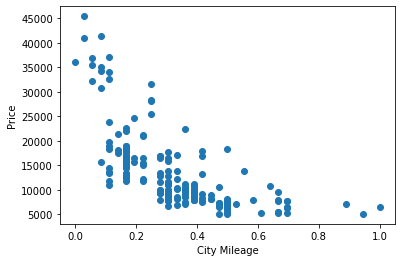

In [58]:
plt.scatter(num_cars['city_mileage'], num_cars['price'])
plt.xlabel('City Mileage')
plt.ylabel('Price')
plt.show()

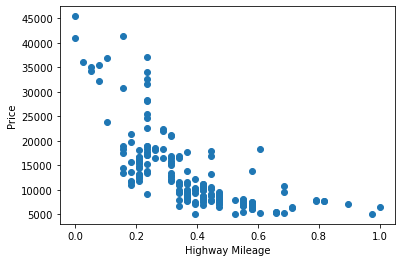

In [31]:
plt.scatter(num_cars['highway_mileage'], num_cars['price'])
plt.xlabel('Highway Mileage')
plt.ylabel('Price')
plt.show()

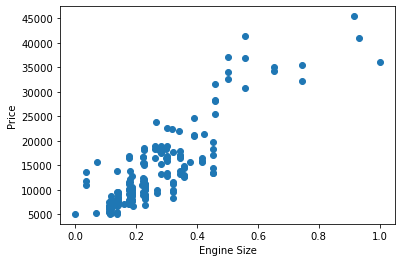

In [32]:
plt.scatter(num_cars['engine_size'], num_cars['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

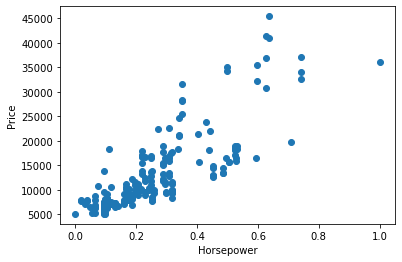

In [33]:
plt.scatter(num_cars['horse_power'], num_cars['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

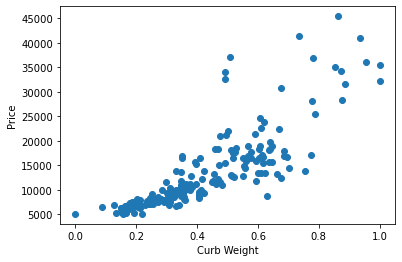

In [34]:
plt.scatter(num_cars['curb_weight'], num_cars['price'])
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.show()

### Training & Testing

In [42]:
x = num_cars[['city_mileage', 'highway_mileage', 'engine_size', 'curb_weight', 'horse_power']]
y = num_cars['price']

#use random_state if want to use a fixed training set
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

In [40]:
len(x_train)

150

In [41]:
len(x_test)

50

In [47]:
# Everytime selects a shuffled training set depending on your test_size
x_train

,city_mileage,highway_mileage,engine_size,curb_weight,horse_power
124,0.166667,0.289474,0.339623,0.500388,0.443925
40,0.305556,0.315789,0.184906,0.378976,0.247664
68,0.250000,0.236842,0.460377,0.778510,0.350467
52,0.500000,0.578947,0.113208,0.177269,0.093458
19,0.694444,0.710526,0.109434,0.163305,0.102804
...,...,...,...,...,...
195,0.305556,0.315789,0.301887,0.561288,0.308411
2,0.305556,0.368421,0.181132,0.329325,0.252336
63,0.361111,0.421053,0.230189,0.363460,0.168224
171,0.305556,0.368421,0.320755,0.576804,0.317757


In [48]:
model = KNeighborsRegressor()
# For training
model.fit(x_train, y_train)

KNeighborsRegressor()

In [51]:
# For prediction
prediction = model.predict(x_test)
prediction

array([ 6484.6,  9844.8,  8648.6,  5801.2,  9273.8,  9579.6,  9273.8,
        7177. ,  9418.2, 37616.2, 31416. ,  6867.4,  8807.8,  7473.8,
        9165. ,  5801.2, 37616.2,  7918.2,  7779. , 16040.8, 37616.2,
       11136.4,  9404.2,  7944.8, 14317.2,  7718.8, 16040.8, 28245.8,
        7590.8, 16040.8, 27202.6, 11578.4, 15080. , 23252.6, 18114. ,
       15370.8, 15542. , 16940.8,  6587.4, 18477.6,  9484.8,  6587.4,
       11979.2,  9943.6,  6612.6, 13255.8,  6587.4, 10953.8, 12376.6,
       17081.4])

In [55]:
y_test

21      6377.0
98      8949.0
38      8845.0
20      5572.0
80      8499.0
26      8558.0
84      6989.0
91      6849.0
164     9298.0
46     32250.0
70     34184.0
88      5499.0
173    10698.0
35      7295.0
129     9295.0
117     5572.0
48     36000.0
181     7775.0
137     5118.0
179    15690.0
72     40960.0
168     9989.0
62     10795.0
161     9258.0
81     12629.0
155     6938.0
103    17199.0
16     36880.0
140     7126.0
102    13499.0
126    34028.0
144    11259.0
133    15040.0
67     28248.0
5      17710.0
196    16515.0
131    11850.0
111    16900.0
119     6229.0
13     24565.0
99      9549.0
23      6229.0
170    11549.0
142     9960.0
53      7395.0
57     15645.0
25      7609.0
146    10198.0
10     16925.0
12     21105.0
Name: price, dtype: float64

In [53]:
# For checking accuracy of the model
accuracy = model.score(x_test, y_test)
accuracy

0.9251053358967571